<a href="https://colab.research.google.com/github/oriolflores7/MyRepo/blob/main/LAB_1_ORIOL_FLORES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# EJERCICIO 1
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
)
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 5)
sns.set(style="whitegrid")


In [2]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
print("Shape of the dataset:", df.shape)
df.head()

Shape of the dataset: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
cols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
data = df[cols].copy()
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [6]:
median_age = data['Age'].median()
data['Age'].fillna(median_age, inplace=True)

mode_embarked = data['Embarked'].mode()[0]
data['Embarked'].fillna(mode_embarked, inplace=True)
data.isnull().sum()

/tmp/ipython-input-1655093760.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(median_age, inplace=True)
/tmp/ipython-input-1655093760.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [7]:
# EJERCICIO 2
data_encoded = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)
X = data_encoded.drop('Survived', axis=1)
y = data_encoded['Survived']
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42, stratify=y
)
X_train.shape, X_test.shape

((712, 8), (179, 8))

In [9]:
tree_clf = DecisionTreeClassifier(
criterion='gini',
max_depth=4,
random_state=42,
)
tree_clf.fit(X_train, y_train)
tree_clf

DecisionTreeClassifier(max_depth=4, random_state=42)

In [10]:
y_pred = tree_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1-score : {f1:.3f}\n")
print("Classification report:\n")
print(classification_report(y_test, y_pred))

Accuracy : 0.788
Precision: 0.844
Recall   : 0.551
F1-score : 0.667

Classification report:

              precision    recall  f1-score   support

           0       0.77      0.94      0.84       110
           1       0.84      0.55      0.67        69

    accuracy                           0.79       179
   macro avg       0.81      0.74      0.76       179
weighted avg       0.80      0.79      0.78       179



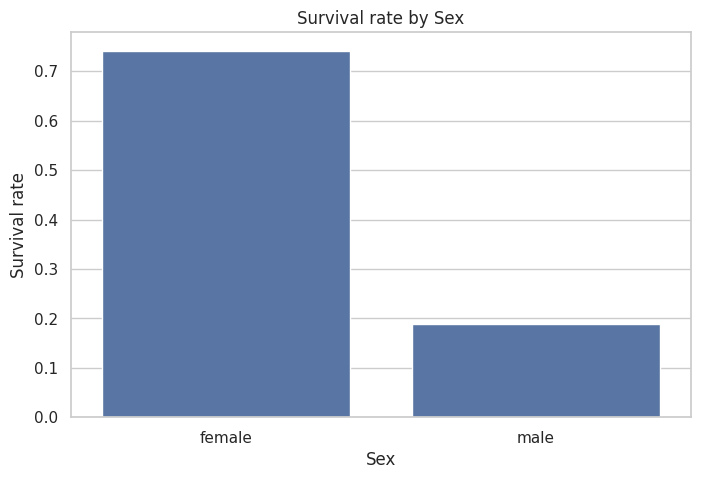

In [11]:
# EJERCICIO 3
survival_by_sex = data.groupby('Sex')['Survived'].mean().reset_index()

sns.barplot(data=survival_by_sex, x='Sex', y='Survived')
plt.title('Survival rate by Sex')
plt.ylabel('Survival rate')
plt.show()

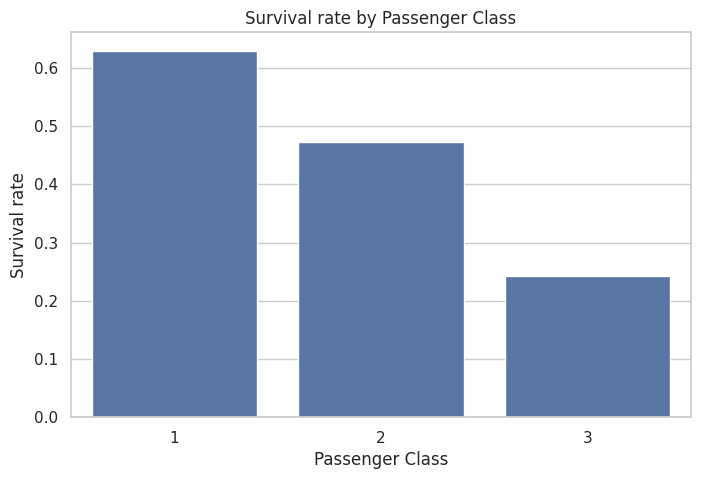

In [12]:
survival_by_class = data.groupby('Pclass')['Survived'].mean().reset_index()

sns.barplot(data=survival_by_class, x='Pclass', y='Survived')
plt.title('Survival rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival rate')
plt.show()

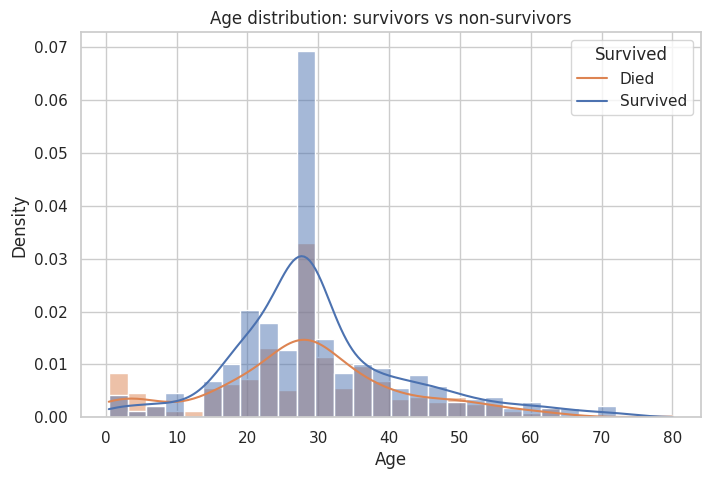

In [13]:
plt.figure()
sns.histplot(data=data, x='Age', hue='Survived', kde=True, bins=30, stat='density')
plt.title('Age distribution: survivors vs non‑survivors')
plt.xlabel('Age')
plt.legend(title='Survived', labels=['Died', 'Survived'])
plt.show()

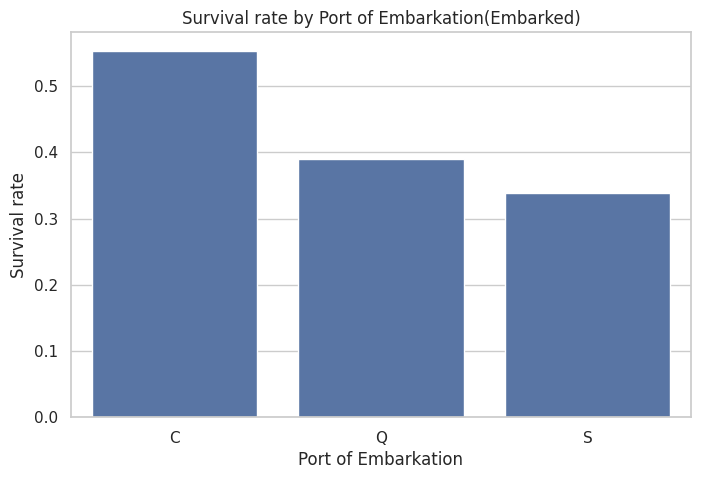

In [14]:
survival_by_embarked = data.groupby('Embarked')['Survived'].mean().reset_index()

sns.barplot(data=survival_by_embarked, x='Embarked', y='Survived')
plt.title('Survival rate by Port of Embarkation(Embarked)')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival rate')
plt.show()

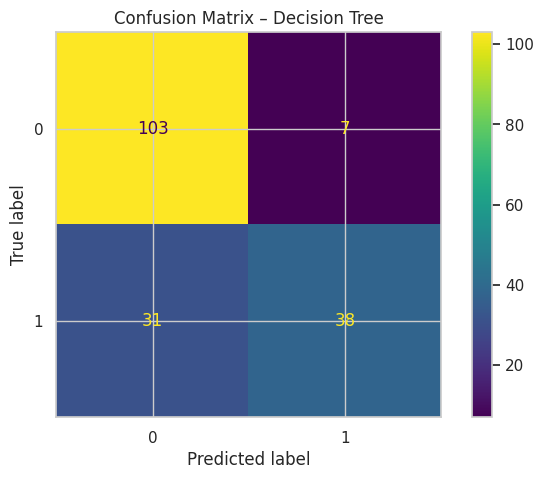

Confusion matrix array:
 [[103   7]
 [ 31  38]]


In [15]:
# EJERCICIO 4
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_clf.classes_)
disp.plot(values_format='d')
plt.title('Confusion Matrix – Decision Tree')
plt.show()
print("Confusion matrix array:\n", cm)


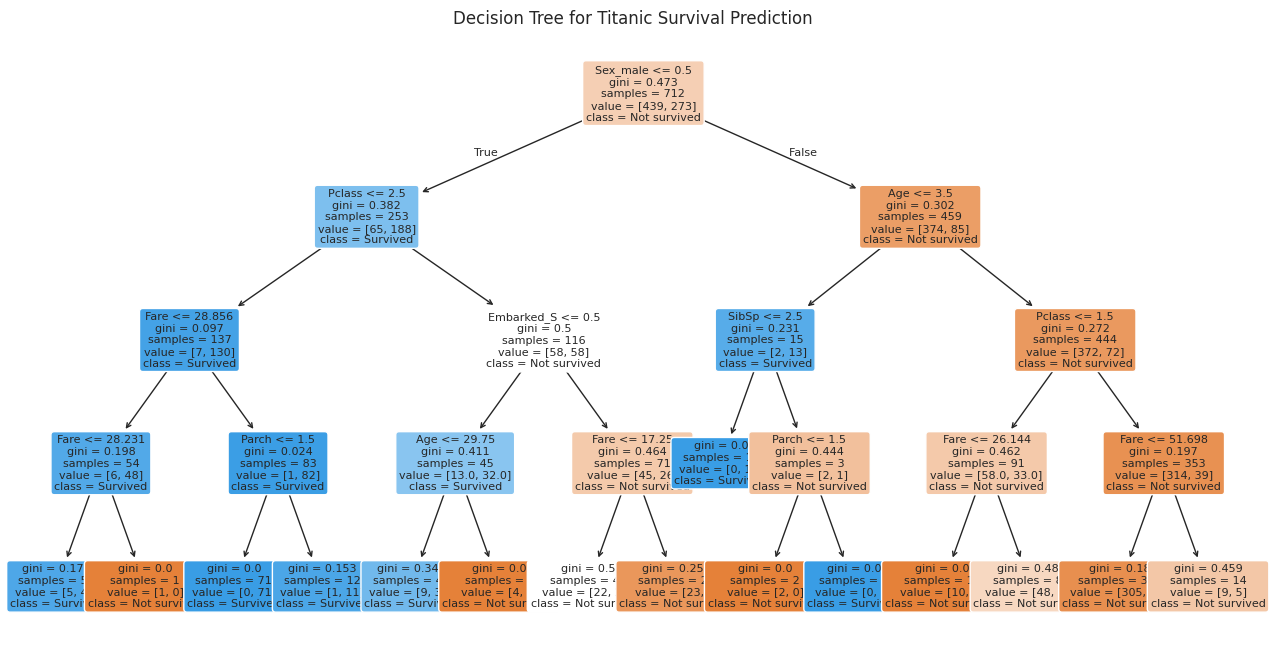

In [16]:
plt.figure(figsize=(16, 8))
plot_tree(
    tree_clf,
    feature_names=X.columns,
    class_names=['Not survived', 'Survived'],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title('Decision Tree for Titanic Survival Prediction')
plt.show()

In [17]:
feature_importances = pd.Series(tree_clf.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)
feature_importances

,0
Sex_male,0.576297
Pclass,0.195920
Age,0.106957
Fare,0.063141
Embarked_S,0.037198
SibSp,0.012109
Parch,0.008377
Embarked_Q,0.000000
